The data utilized for the analysis of future work was sourced from GitHub, focusing on user errors. This approach facilitated the visualization of common mistakes, thereby providing valuable insights into areas requiring improvement.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [14]:
df = pd.read_csv('developer_human_errors.csv')
df = df.dropna()
print(df.head())

       ID        SOURCE                                        COMMENT_URL  \
0  HE_000         Issue  https://github.com/mono/CppSharp/issues/814#is...   
1  HE_001  Pull Request  https://github.com/mattermost/mattermost-serve...   
2  HE_002         Issue  https://github.com/NativeScript/NativeScript/i...   
3  HE_003  Pull Request  https://github.com/video-dev/hls.js/pull/2623#...   
4  HE_004         Issue  https://github.com/openvinotoolkit/cvat/issues...   

                                        COMMENT_TEXT HUMAN_ERROR_TYPE  \
0  I'm sorry, I should have taken care of this to...            Lapse   
1  Ah, sorry @jurgenhaas - I thought it was inclu...            Lapse   
2  @N3ll -- Sorry, I haven't had a chance since w...            Lapse   
3  Hi @gkolb,\nSorry I didn't get around to mergi...            Lapse   
4  Hi @kirill-sizov,\nApologies for being a bit l...            Lapse   

  THESE_V4_ID                               THESE_NAME  
0         L01  Forgetting to Finish

In [19]:
# Load the dataset
data = pd.read_csv("developer_human_errors.csv")

# Check the first few rows of the dataset
print(data.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['COMMENT_TEXT'], data['HUMAN_ERROR_TYPE'], test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


       ID        SOURCE                                        COMMENT_URL  \
0  HE_000         Issue  https://github.com/mono/CppSharp/issues/814#is...   
1  HE_001  Pull Request  https://github.com/mattermost/mattermost-serve...   
2  HE_002         Issue  https://github.com/NativeScript/NativeScript/i...   
3  HE_003  Pull Request  https://github.com/video-dev/hls.js/pull/2623#...   
4  HE_004         Issue  https://github.com/openvinotoolkit/cvat/issues...   

                                        COMMENT_TEXT HUMAN_ERROR_TYPE  \
0  I'm sorry, I should have taken care of this to...            Lapse   
1  Ah, sorry @jurgenhaas - I thought it was inclu...            Lapse   
2  @N3ll -- Sorry, I haven't had a chance since w...            Lapse   
3  Hi @gkolb,\nSorry I didn't get around to mergi...            Lapse   
4  Hi @kirill-sizov,\nApologies for being a bit l...            Lapse   

  THESE_V4_ID                               THESE_NAME  
0         L01  Forgetting to Finish

c:\Users\Will Reid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Will Reid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Will Reid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

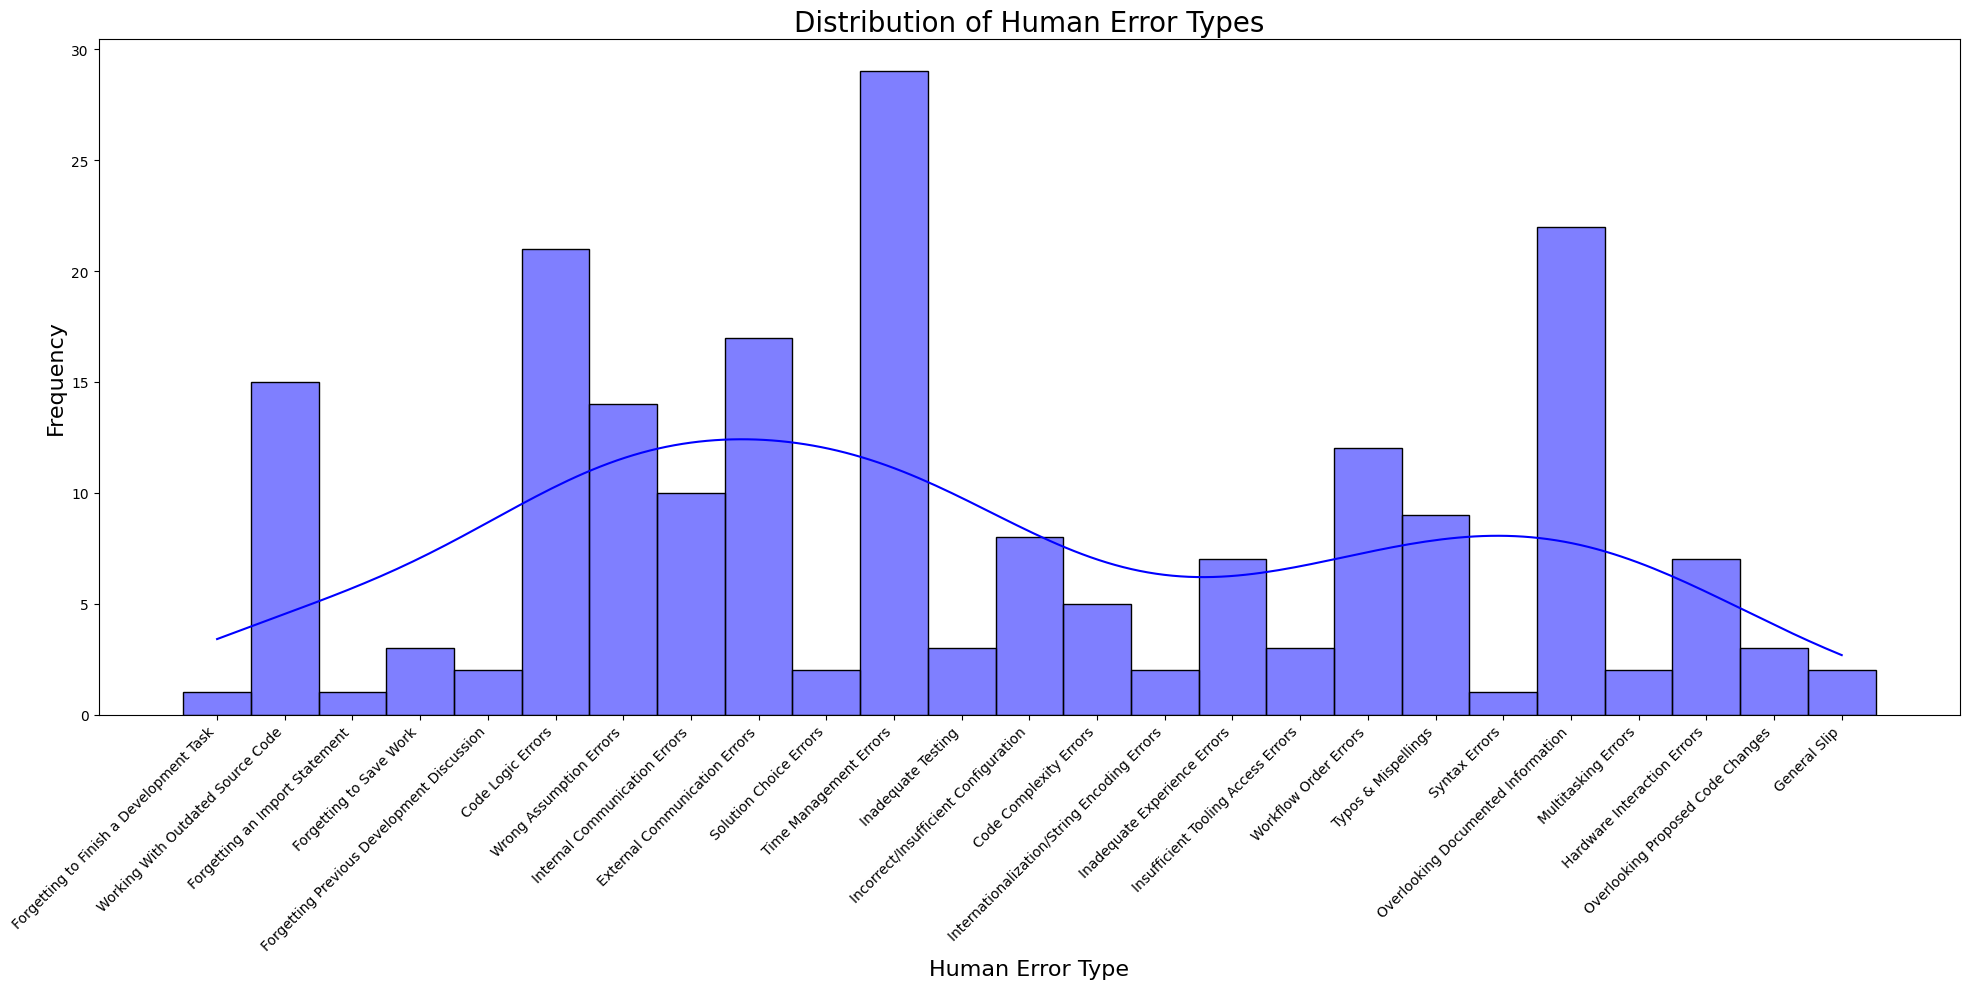

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv("developer_human_errors.csv")

# Increase the figure size
plt.figure(figsize=(20, 10))

sns.histplot(df['THESE_NAME'], bins=20, kde=True, color='blue', edgecolor='black')

# Increase the font size of the labels and title
plt.title('Distribution of Human Error Types', fontsize=20)
plt.xlabel('Human Error Type', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Rotate the x-axis labels and align them right
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()